In [2]:
import numpy as np
from empiricaldist import Pmf
from utils import decorate

In [2]:
hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)

In [42]:
def update_train(pmf, dataset):
    """Update pmf based on data."""
    hypos = pmf.qs
    for data in dataset:
        likelihood = 1 / hypos
        impossible = data > hypos
        likelihood[impossible] = 0
        pmf *= likelihood
    pmf.normalize()


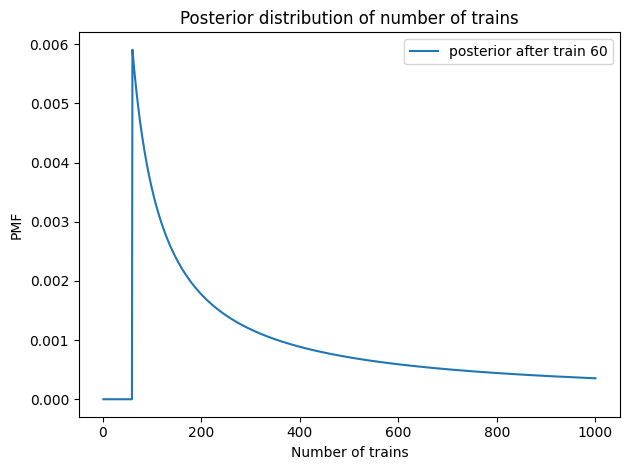

In [43]:
data = 60
posterior = prior.copy()
update_train(posterior, [60])
posterior.plot(label='posterior after train 60')
decorate(xlabel='Number of trains', ylabel='PMF', 
         title='Posterior distribution of number of trains')

In [44]:
posterior.mean()

np.float64(333.41989326370776)

In [56]:
def update_train_uniform(hypos_range, dataset):
    posteriors = []
    for hypos_r in hypos_range:
        hypos = np.arange(1, hypos_r+1)
        prior = Pmf(1, hypos)
        posterior = prior
        update_train(posterior, dataset)
        posteriors.append(posterior)
    return posteriors

In [57]:
hypos_range = [500, 1000, 2000]
dataset = [60]
posteriors = update_train_uniform(hypos_range, dataset)
for data, posterior in zip(hypos_range, posteriors):
    print(data, posterior.mean())

500 207.0792279834105
1000 333.41989326370776
2000 552.1790171646376


In [58]:
hypos_range = [500, 1000, 2000]
dataset = [60, 30, 90]
posteriors = update_train_uniform(hypos_range, dataset)
for data, posterior in zip(hypos_range, posteriors):
    print(data, posterior.mean())

500 151.84958795903836
1000 164.30558642273346
2000 171.3381810915096


In [79]:
hypos = np.arange(1, 2001)
alpha = 1.0
ps = hypos**(-alpha)
power = Pmf(ps, hypos, name='power law')
power.normalize()

np.float64(8.178368103610282)

In [80]:
hypos = np.arange(1, 1001)
uniform = Pmf(1, hypos, name='uniform')
uniform.normalize()

np.int64(1000)

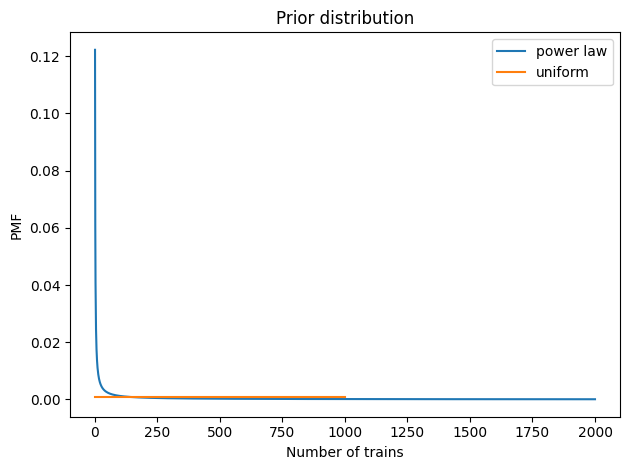

In [81]:
power.plot(label='power law')
uniform.plot(label='uniform')
decorate(xlabel='Number of trains', ylabel='PMF',
         title='Prior distribution')

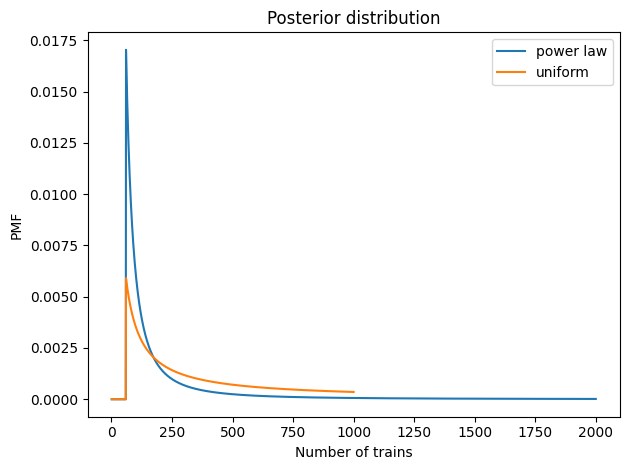

In [82]:
dataset = [60]
update_train(power, dataset)
update_train(uniform, dataset)
power.plot(label='power law')
uniform.plot(label='uniform')
decorate(xlabel='Number of trains', ylabel='PMF',
         title='Posterior distribution')

In [83]:
def update_train_power(hypos_range, dataset):
    posteriors = []
    for hypos_r in hypos_range:
        hypos = np.arange(1, hypos_r+1)
        alpha = 1.0
        ps = hypos**(-alpha)
        prior = Pmf(ps, hypos)
        prior.normalize()
        posterior = prior
        update_train(posterior, dataset)
        posteriors.append(posterior)
    return posteriors

In [84]:
hypos_range = [500, 1000, 2000]
dataset = [60, 30, 90]
posteriors = update_train_power(hypos_range, dataset)
for data, posterior in zip(hypos_range, posteriors):
    print(data, posterior.mean())

500 130.7084698625599
1000 133.2752313750311
2000 133.99746308073125


In [91]:
power = posteriors[2]

In [92]:
power.prob_le(100)

np.float64(0.2937469222495771)

In [93]:
power.quantile(0.5)

array(113.)

In [94]:
power.quantile([0.05, 0.95])

array([ 91., 243.])

In [95]:
power.credible_interval(0.9)

array([ 91., 243.])

## Exercise 5-1. 

Suppose you are giving a talk in a large lecture hall and the fire marshal interrupts because they think the audience exceeds 1,200 people, which is the safe capacity of the room. 

You think there are fewer then 1,200 people, and you offer to prove it. It would take too long to count, so you try an experiment: 

- You ask how many people were born on May 11 and two people raise their hands.
- You ask how many were born on May 23 and 1 person raises their hand. 
- Finally, you ask how many were born on August 1, and no one raises their hand. 

How many people are in the audience? What is the probability that there are more than 1,200 people? Hint: Remember the binomial distribution.

In [103]:
hypos = np.arange(1, 2000, 10)

In [104]:
prior = Pmf(1, hypos)
prior.normalize()

np.int64(200)

In [106]:
from scipy.stats import binom

In [108]:
likelihood1 = binom.pmf(2, hypos, 1/365)
likelihood2 = binom.pmf(1, hypos, 1/365)
likelihood3 = binom.pmf(0, hypos, 1/365)

In [109]:
posterior = prior * likelihood1 * likelihood2 * likelihood3
posterior.normalize()

np.float64(0.00675879980045154)

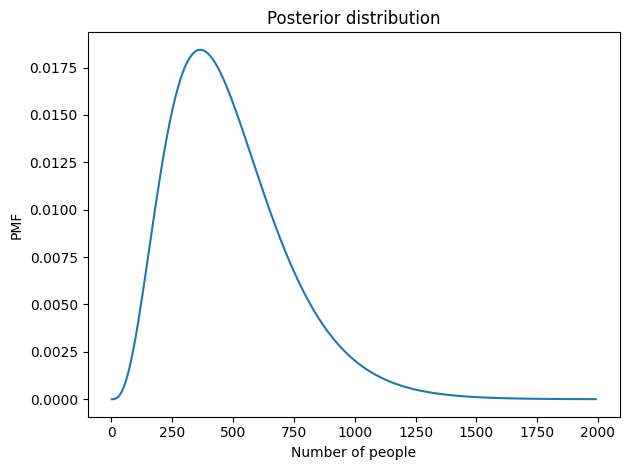

In [110]:
posterior.plot()
decorate(xlabel='Number of people', ylabel='PMF',
         title='Posterior distribution')

In [111]:
posterior.mean()

np.float64(486.22551616872903)

In [116]:
posterior.prob_gt(1200)

np.float64(0.011543092507705213)

In [114]:
posterior.quantile([0.05, 0.95])

array([171., 941.])

In [115]:
posterior.credible_interval(0.9)

array([171., 941.])

## Exercise 5-2. 

I often see rabbits in the garden behind my house, but it’s not easy to tell them apart, so I don’t really know how many there are.

Suppose I deploy a motion-sensing camera trap that takes a picture of the first rabbit it sees each day. After three days, I compare the pictures and conclude that two of them are the same rabbit and the other is different. 

How many rabbits visit my garden? 

To answer this question, we have to think about the prior distribution and the likeli‐ hood of the data: 

- I have sometimes seen four rabbits at the same time, so I know there are at least that many. I would be surprised if there were more than 10. So, at least as a start‐ ing place, I think a uniform prior from 4 to 10 is reasonable. 
- To keep things simple, let’s assume that all rabbits who visit my garden are equally likely to be caught by the camera trap in a given day. Let’s also assume it is guaranteed that the camera trap gets a picture every day.

In [118]:
hypos = np.arange(4, 11)
prior = Pmf(1, hypos)
prior.normalize()

np.int64(7)

In [125]:
N = hypos
# (1 / N) * ((N-1)/N)
likelihood = (N-1)/ N **2
posterior = prior * likelihood
posterior.normalize()

np.float64(0.129568328654213)

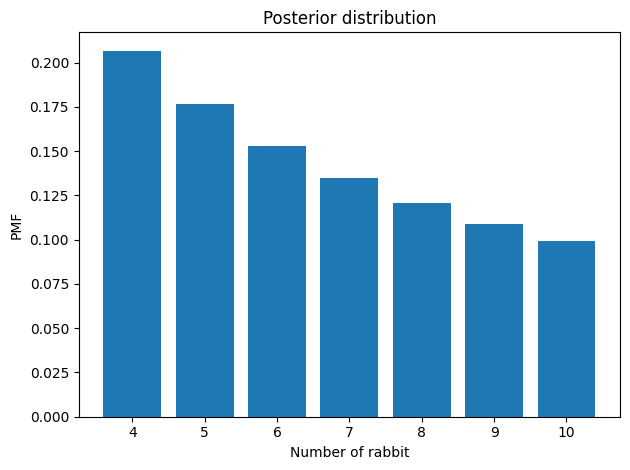

In [126]:
posterior.bar()
decorate(xlabel='Number of rabbit', ylabel='PMF',
         title='Posterior distribution')

In [129]:
# what if 3 different rabbits captured
N = hypos
likelihood1 = (N-1)/N
likelihood2 = (N-2)/N
posterior2 = prior * likelihood1 * likelihood2

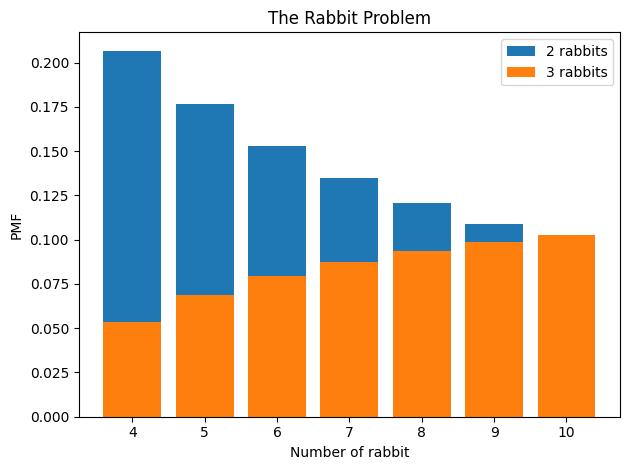

In [132]:
posterior.bar(label='2 rabbits')
posterior2.bar(label='3 rabbits')
decorate(xlabel='Number of rabbit', ylabel='PMF',
         title='The Rabbit Problem')

## Exercise 5-3. 

Suppose that in the criminal justice system, all prison sentences are either 1, 2, or 3 years, with an equal number of each. One day, you visit a prison and choose a prisoner at random. 

What is the probability that they are serving a 3-year sentence? 

In [133]:
1/3

0.3333333333333333

What is the average remaining sentence of the prisoners you observe?

In [138]:
# remaining sentence in month
hypos = np.arange(1, 4)

In [139]:
prior = Pmf(1/3, hypos)
prior

,probs
1,0.333333
2,0.333333
3,0.333333


In [141]:
# the probability of oberserving a prisoner at random time 
# is proportional to the time remaining
likelihood = hypos
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
1,0.166667
2,0.333333
3,0.500000


In [142]:
posterior.mean()

np.float64(2.333333333333333)

In [143]:
posterior.mean()/2

np.float64(1.1666666666666665)

## Exercise 5-4. 

If I chose a random adult in the US, what is the probability that they have a sibling? To be precise, what is the probability that their mother has had at least one other child? 

This article from the Pew Research Center provides some relevant data.

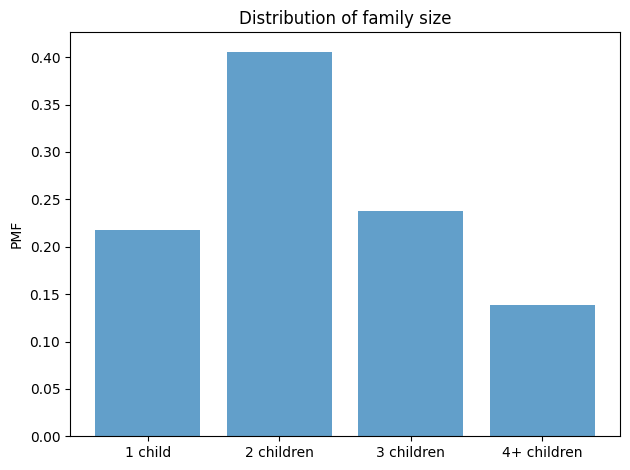

In [150]:
import matplotlib.pyplot as plt

qs = [1, 2, 3, 4]
ps = [22, 41, 24, 14]
prior = Pmf(ps, qs)
prior.normalize()
prior.bar(alpha=0.7)

plt.xticks(qs, ['1 child', '2 children', '3 children', '4+ children'])
decorate(ylabel='PMF',
         title='Distribution of family size')

In [151]:
# Probability to choose a random is proportional to the family size
likelihood = qs
posterior = prior * likelihood
posterior.normalize()
posterior, prior

(1    0.094828
 2    0.353448
 3    0.310345
 4    0.241379
 dtype: float64,
 1    0.217822
 2    0.405941
 3    0.237624
 4    0.138614
 dtype: float64)

In [152]:
# the probability of they have a sibling is the probability that
# they do not come from a family of size 1
1 - posterior(1)

np.float64(0.9051724137931034)

In [153]:
posterior.prob_gt(1)

np.float64(0.9051724137931034)

## Exercise 5-5. 

The Doomsday argument is “a probabilistic argument that claims to predict the number of future members of the human species given an estimate of the total number of humans born so far.” 

Suppose there are only two kinds of intelligent civilizations that can happen in the universe. The “short-lived” kind go extinct after only 200 billion individuals are born. The “long-lived” kind survive until 2,000 billion individuals are born. And suppose that the two kinds of civilization are equally likely. Which kind of civilization do you think we live in?

The Doomsday argument says we can use the total number of humans born so far as data. According to the Population Reference Bureau, the total number of people who have ever lived is about 108 billion. 

Since you were born quite recently, let’s assume that you are, in fact, human being number 108 billion. If N is the total number who will ever live and we consider you to be a randomly-chosen person, it is equally likely that you could have been person 1, or N, or any number in between. So what is the probability that you would be number 108 billion? 

Given this data and dubious prior, what is the probability that our civilization will be short-lived?

In [3]:
hypos = [200, 2000]
prior = Pmf(1, hypos)
prior.normalize()
prior

,probs
200,0.5
2000,0.5


In [4]:
likelihood = [1/200, 1/2000]
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
200,0.909091
2000,0.090909
